In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

In [1]:
#mounting google drive in colab to access and save files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Course work/pcos_prediction_dataset.csv")

In [4]:
df = df.map(lambda x: x.strip() if isinstance(x, str) else x)

In [5]:
print("Dataset Preview:")
print(df.head())

Dataset Preview:
      Country  Age          BMI Menstrual Regularity Hirsutism Acne Severity  \
0  Madagascar   26   Overweight              Regular       Yes        Severe   
1     Vietnam   16  Underweight              Regular       Yes           NaN   
2     Somalia   41       Normal              Regular        No      Moderate   
3      Malawi   27       Normal            Irregular        No          Mild   
4      France   26   Overweight            Irregular       Yes           NaN   

  Family History of PCOS Insulin Resistance  Lifestyle Score Stress Levels  \
0                    Yes                Yes                2           Low   
1                     No                Yes                4          High   
2                     No                 No                7        Medium   
3                     No                 No               10           Low   
4                     No                 No                7        Medium   

  Urban/Rural Socioeconomic Statu

In [6]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 17 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Country                      120000 non-null  object 
 1   Age                          120000 non-null  int64  
 2   BMI                          120000 non-null  object 
 3   Menstrual Regularity         120000 non-null  object 
 4   Hirsutism                    120000 non-null  object 
 5   Acne Severity                59915 non-null   object 
 6   Family History of PCOS       120000 non-null  object 
 7   Insulin Resistance           120000 non-null  object 
 8   Lifestyle Score              120000 non-null  int64  
 9   Stress Levels                120000 non-null  object 
 10  Urban/Rural                  120000 non-null  object 
 11  Socioeconomic Status         120000 non-null  object 
 12  Awareness of PCOS            120000 non-nul

In [7]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
                 Age  Lifestyle Score  Undiagnosed PCOS Likelihood
count  120000.000000    120000.000000                120000.000000
mean       31.980508         5.506567                     0.149937
std        10.096799         2.871052                     0.057786
min        15.000000         1.000000                     0.050001
25%        23.000000         3.000000                     0.099820
50%        32.000000         6.000000                     0.149844
75%        41.000000         8.000000                     0.200061
max        49.000000        10.000000                     0.249998


In [8]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Country                            0
Age                                0
BMI                                0
Menstrual Regularity               0
Hirsutism                          0
Acne Severity                  60085
Family History of PCOS             0
Insulin Resistance                 0
Lifestyle Score                    0
Stress Levels                      0
Urban/Rural                        0
Socioeconomic Status               0
Awareness of PCOS                  0
Fertility Concerns                 0
Undiagnosed PCOS Likelihood        0
Ethnicity                          0
Diagnosis                          0
dtype: int64


In [12]:
df = pd.read_csv('/content/drive/MyDrive/Course work/pcos_prediction_dataset.csv')

df.columns = df.columns.str.strip()

print("\nColumns in the dataset:")
print(df.columns.tolist())

print("\nTarget Variable (Diagnosis) Distribution:")
print(df["Diagnosis"].value_counts())

print("\nDataset Information:")
print(df.info())

print("\nFirst few rows of the dataset:")
print(df.head())



Columns in the dataset:
['Country', 'Age', 'BMI', 'Menstrual Regularity', 'Hirsutism', 'Acne Severity', 'Family History of PCOS', 'Insulin Resistance', 'Lifestyle Score', 'Stress Levels', 'Urban/Rural', 'Socioeconomic Status', 'Awareness of PCOS', 'Fertility Concerns', 'Undiagnosed PCOS Likelihood', 'Ethnicity', 'Diagnosis']

Target Variable (Diagnosis) Distribution:
Diagnosis
No     107405
Yes     12595
Name: count, dtype: int64

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 17 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Country                      120000 non-null  object 
 1   Age                          120000 non-null  int64  
 2   BMI                          120000 non-null  object 
 3   Menstrual Regularity         120000 non-null  object 
 4   Hirsutism                    120000 non-null  object 
 5   Acne Severity 

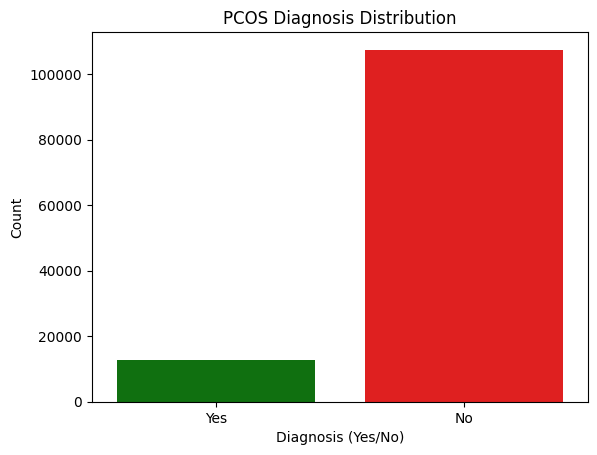

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/Course work/pcos_prediction_dataset.csv')

df.columns = df.columns.str.strip()

color_map = {"No": "red", "Yes": "green"}

sns.countplot(data=df, x="Diagnosis", hue="Diagnosis", palette=color_map, legend=False)
plt.title("PCOS Diagnosis Distribution")
plt.xlabel("Diagnosis (Yes/No)")
plt.ylabel("Count")
plt.show()


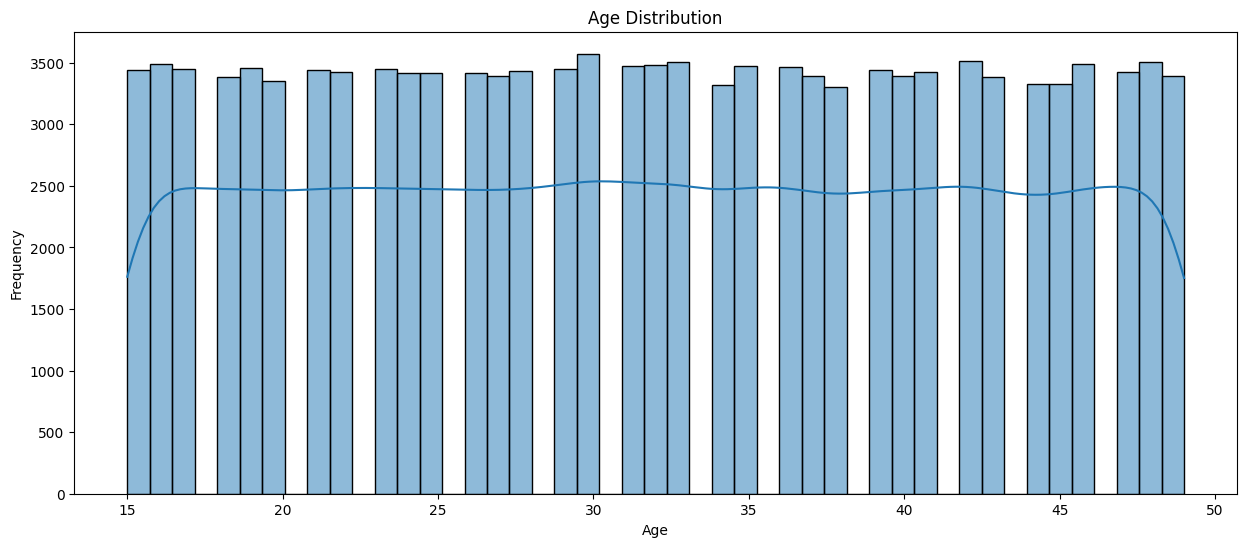

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/Course work/pcos_prediction_dataset.csv')

df.columns = df.columns.str.strip()

# Check if the 'Age' column exists before plotting
if 'Age' in df.columns:
    plt.figure(figsize=(15, 6))
    sns.histplot(df['Age'], kde=True)
    plt.title('Age Distribution')
    plt.xlabel('Age')  # Added x-axis label
    plt.ylabel('Frequency')  # Added y-axis label
    plt.show()
else:
    print("The 'Age' column was not found in the dataset.")


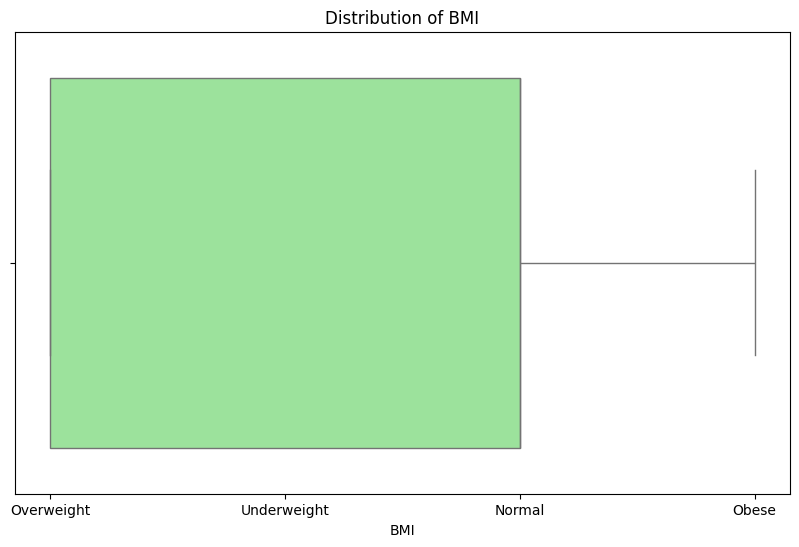

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/Course work/pcos_prediction_dataset.csv')

df.columns = df.columns.str.strip()

# Check if the 'BMI' column exists before plotting
if 'BMI' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='BMI', color='lightgreen')
    plt.title('Distribution of BMI')
    plt.xlabel('BMI')  # Added x-axis label
    plt.show()
else:
    print("The 'BMI' column was not found in the dataset.")


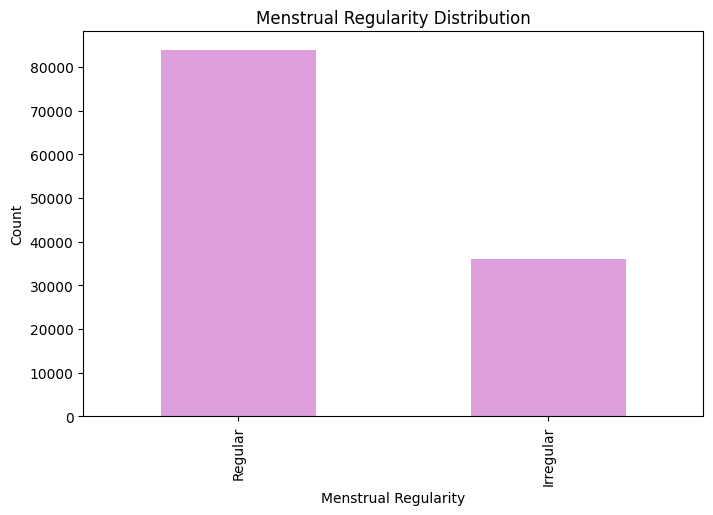

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/Course work/pcos_prediction_dataset.csv')

df.columns = df.columns.str.strip()

# Check if the 'Menstrual Regularity' column exists before plotting
if 'Menstrual Regularity' in df.columns:
    plt.figure(figsize=(8, 5))
    df['Menstrual Regularity'].value_counts().plot(kind='bar', color='plum')
    plt.title('Menstrual Regularity Distribution')
    plt.xlabel('Menstrual Regularity')
    plt.ylabel('Count')
    plt.show()
else:
    print("The 'Menstrual Regularity' column was not found in the dataset.")


In [24]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Course work/pcos_prediction_dataset.csv')

df.columns = df.columns.str.strip()

# Mapping 'Menstrual Regularity'
df['Menstrual Regularity'] = df['Menstrual Regularity'].map({'Regular': 1, 'Irregular': 0})

# Mapping 'Diagnosis'
df['Diagnosis'] = df['Diagnosis'].map({'Yes': 1, 'No': 0})

# Print the first few rows to verify the mapping
print(df.head())

# Print data types to confirm the mapping
print(df.dtypes)


      Country  Age          BMI  Menstrual Regularity Hirsutism Acne Severity  \
0  Madagascar   26   Overweight                     1       Yes        Severe   
1     Vietnam   16  Underweight                     1       Yes           NaN   
2     Somalia   41       Normal                     1        No      Moderate   
3      Malawi   27       Normal                     0        No          Mild   
4      France   26   Overweight                     0       Yes           NaN   

  Family History of PCOS Insulin Resistance  Lifestyle Score Stress Levels  \
0                    Yes                Yes                2           Low   
1                     No                Yes                4          High   
2                     No                 No                7        Medium   
3                     No                 No               10           Low   
4                     No                 No                7        Medium   

  Urban/Rural Socioeconomic Status Awareness

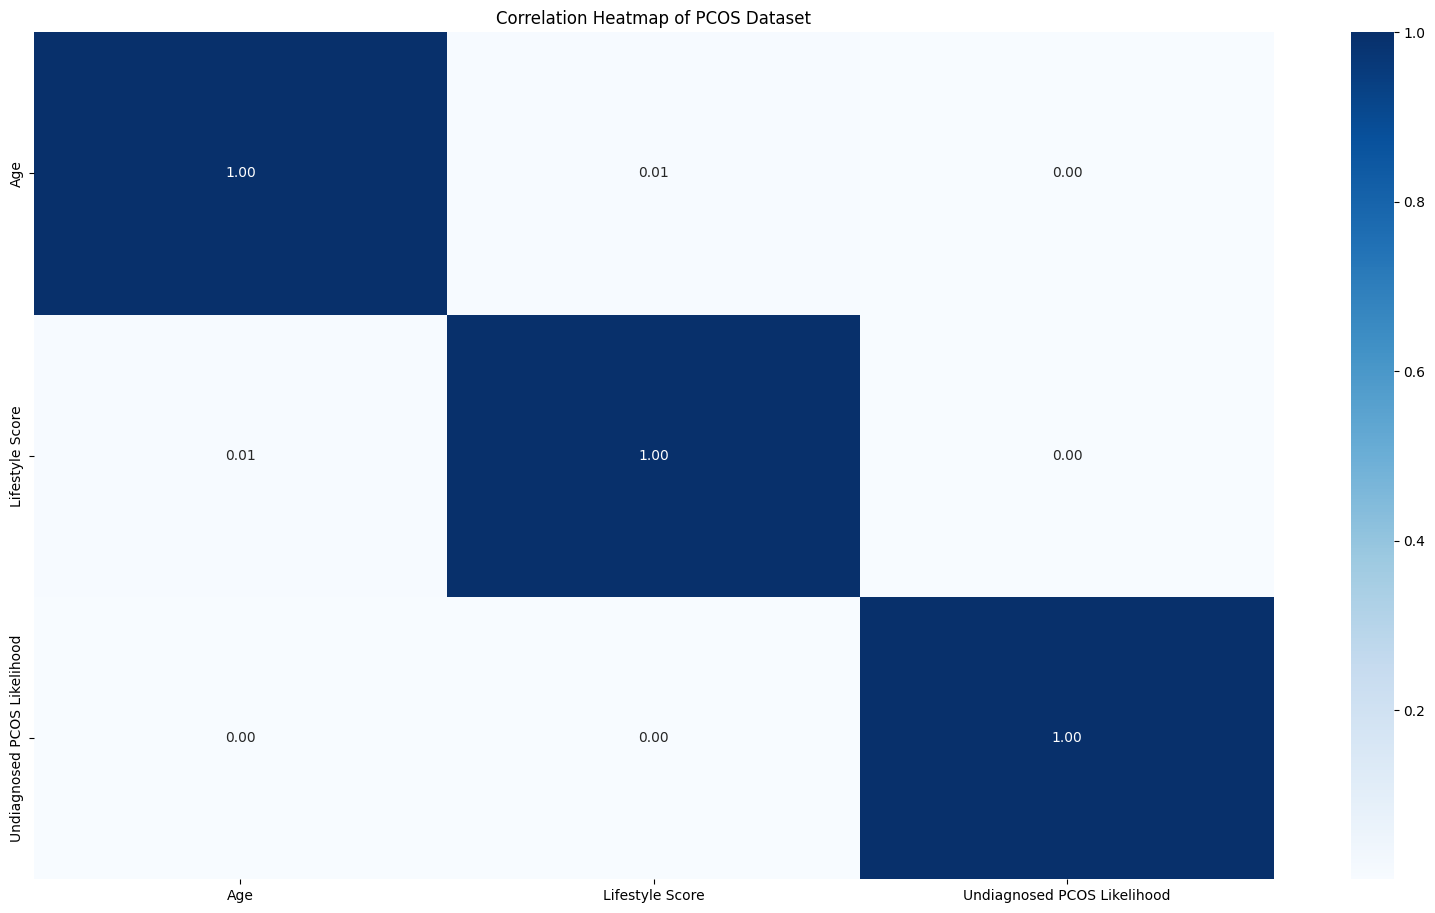

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/Course work/pcos_prediction_dataset.csv')

df.columns = df.columns.str.strip()

# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(20, 11))
sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f")  # Added fmt
plt.title('Correlation Heatmap of PCOS Dataset')
plt.show()


In [26]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Course work/pcos_prediction_dataset.csv')

df.columns = df.columns.str.strip()

# Map categorical variables to numerical
df['Menstrual Regularity'] = df['Menstrual Regularity'].map({'Regular': 1, 'Irregular': 0})
df['Diagnosis'] = df['Diagnosis'].map({'Yes': 1, 'No': 0})

# Define features (X) and target (y)
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

# Print the shapes of X and y to verify
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Display the first few rows of X
print("\nFirst few rows of X:")
print(X.head())

# Display the first few values of y
print("\nFirst few values of y:")
print(y.head())


Shape of X: (120000, 16)
Shape of y: (120000,)

First few rows of X:
      Country  Age          BMI  Menstrual Regularity Hirsutism Acne Severity  \
0  Madagascar   26   Overweight                     1       Yes        Severe   
1     Vietnam   16  Underweight                     1       Yes           NaN   
2     Somalia   41       Normal                     1        No      Moderate   
3      Malawi   27       Normal                     0        No          Mild   
4      France   26   Overweight                     0       Yes           NaN   

  Family History of PCOS Insulin Resistance  Lifestyle Score Stress Levels  \
0                    Yes                Yes                2           Low   
1                     No                Yes                4          High   
2                     No                 No                7        Medium   
3                     No                 No               10           Low   
4                     No                 No           

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Course work/pcos_prediction_dataset.csv')

# Clean column names
df.columns = df.columns.str.strip()

# Map categorical variables to numerical
df['Menstrual Regularity'] = df['Menstrual Regularity'].map({'Regular': 1, 'Irregular': 0})
df['Diagnosis'] = df['Diagnosis'].map({'Yes': 1, 'No': 0})

# Handle missing values for categorical variables
df.fillna(df.mode().iloc[0], inplace=True)  # Fill missing categorical values with mode

# Define features (X) and target (y)
X = df.drop(['Diagnosis', 'Country'], axis=1)  # Drop 'Country' column
y = df['Diagnosis']

# Make sure X contains only numeric values
# Use pd.get_dummies if you have categorical columns that need encoding (not already encoded)
X = pd.get_dummies(X, drop_first=True)  # If necessary, apply one-hot encoding to categorical columns

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()

# Fit and transform X_train
X_train = scaler.fit_transform(X_train)

# Transform X_test based on the scaler fitted on X_train
X_test = scaler.transform(X_test)

# Print the shapes of the datasets after scaling
print("Shape of X_train after scaling:", X_train.shape)
print("Shape of X_test after scaling:", X_test.shape)


Shape of X_train after scaling: (96000, 23)
Shape of X_test after scaling: (24000, 23)


In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Logistic Regression class (as provided)
class LogisticRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = 0

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        # Initialize parameters
        m, n = X.shape
        self.weights = np.zeros(n)

        # Gradient Descent
        for _ in range(self.epochs):
            linear_model = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(linear_model)

            # Compute gradients
            dw = (1 / m) * np.dot(X.T, (predictions - y))
            db = (1 / m) * np.sum(predictions - y)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(linear_model)
        return [1 if i > 0.5 else 0 for i in predictions]

# Load the data
df = pd.read_csv('/content/drive/MyDrive/Course work/pcos_prediction_dataset.csv')

# Data preprocessing
df.columns = df.columns.str.strip()

# Map categorical variables to numerical (specific mappings)
df['Menstrual Regularity'] = df['Menstrual Regularity'].map({'Regular': 1, 'Irregular': 0})
df['Diagnosis'] = df['Diagnosis'].map({'Yes': 1, 'No': 0})

# Handle missing values (fill with the mean for numerical columns)
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        df[col] = df[col].fillna(df[col].mean())
    elif df[col].dtype == 'object':
        # Fill missing categorical values with the mode (most frequent value)
        df[col] = df[col].fillna(df[col].mode()[0])

# Encode categorical variables using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Select features and target (assuming 'Diagnosis' is the target column)
X = df.drop(['Diagnosis'], axis=1)
y = df['Diagnosis']

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data (Standardize features)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Logistic Regression model
model = LogisticRegression(learning_rate=0.01, epochs=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))


Accuracy: 0.8940
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     21457
           1       0.00      0.00      0.00      2543

    accuracy                           0.89     24000
   macro avg       0.45      0.50      0.47     24000
weighted avg       0.80      0.89      0.84     24000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [34]:
log_reg = LogisticRegression(learning_rate=0.01, epochs=1000)
log_reg.fit(X_train, y_train)

In [36]:
y_pred_train = log_reg.predict(X_train)
y_pred_test = log_reg.predict(X_test)

In [37]:
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1

In [38]:
train_accuracy, train_precision, train_recall, train_f1 = evaluate_model(y_train, y_pred_train)
print(f"Training Accuracy: {train_accuracy}")
print(f"Training Precision: {train_precision}")
print(f"Training Recall: {train_recall}")
print(f"Training F1 Score: {train_f1}")

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training Accuracy: 0.8952916666666667
Training Precision: 0.0
Training Recall: 0.0
Training F1 Score: 0.0


In [39]:
test_accuracy, test_precision, test_recall, test_f1 = evaluate_model(y_test, y_pred_test)
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")
print(f"Test F1 Score: {test_f1}")

Test Accuracy: 0.8940416666666666
Test Precision: 0.0
Test Recall: 0.0
Test F1 Score: 0.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [40]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_leaf=5)

In [41]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5)

In [42]:
y_pred_rf_train = rf_model.predict(X_train)
y_pred_rf_test = rf_model.predict(X_test)

In [43]:
train_accuracy_rf, train_precision_rf, train_recall_rf, train_f1_rf = evaluate_model(y_train, y_pred_rf_train)

print(f"Random Forest Training Accuracy: {train_accuracy_rf}")
print(f"Random Forest Training Precision: {train_precision_rf}")
print(f"Random Forest Training Recall: {train_recall_rf}")
print(f"Random Forest Training F1 Score: {train_f1_rf}")

Random Forest Training Accuracy: 0.8952916666666667
Random Forest Training Precision: 0.0
Random Forest Training Recall: 0.0
Random Forest Training F1 Score: 0.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [44]:
test_accuracy_rf, test_precision_rf, test_recall_rf, test_f1_rf = evaluate_model(y_test, y_pred_rf_test)
print(f"Random Forest Test Accuracy: {test_accuracy_rf}")
print(f"Random Forest Test Precision: {test_precision_rf}")
print(f"Random Forest Test Recall: {test_recall_rf}")
print(f"Random Forest Test F1 Score: {test_f1_rf}")

Random Forest Test Accuracy: 0.8940416666666666
Random Forest Test Precision: 0.0
Random Forest Test Recall: 0.0
Random Forest Test F1 Score: 0.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression

# Load the data
df = pd.read_csv('/content/drive/MyDrive/Course work/pcos_prediction_dataset.csv')

# Data preprocessing
df.columns = df.columns.str.strip()

# Map categorical variables to numerical (specific mappings)
df['Menstrual Regularity'] = df['Menstrual Regularity'].map({'Regular': 1, 'Irregular': 0})
df['Diagnosis'] = df['Diagnosis'].map({'Yes': 1, 'No': 0})

# Handle missing values (fill with the mean for numerical columns)
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        df[col] = df[col].fillna(df[col].mean())
    elif df[col].dtype == 'object':
        # If categorical column, fill missing values with the mode (most frequent value)
        df[col] = df[col].fillna(df[col].mode()[0])

# Convert non-numeric columns (such as 'Obese' in 'BMI') to numeric
# Example: If a column like 'BMI' has categorical values like 'Obese', we can map them to numeric values.
# Here we handle possible BMI values with string categories.
df['BMI'] = df['BMI'].map({'Underweight': 1, 'Normal': 2, 'Overweight': 3, 'Obese': 4})

# One-hot encode categorical variables if any left after processing
df = pd.get_dummies(df, drop_first=True)

# Select features and target
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data (Standardize features)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300],
    'penalty': ['l1', 'l2']
}

# Initialize GridSearchCV with scikit-learn's LogisticRegression
log_reg = LogisticRegression()
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_log_reg_params = grid_search.best_params_
best_log_reg_model = grid_search.best_estimator_

print(f"Best Hyperparameters for Logistic Regression: {best_log_reg_params}")

# Evaluate the best model on the test set
y_pred = best_log_reg_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy with Best Model: {accuracy:.4f}")
print(classification_report(y_test, y_pred))


Best Hyperparameters for Logistic Regression: {'C': 0.001, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Test Accuracy with Best Model: 0.8940
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     21457
           1       0.00      0.00      0.00      2543

    accuracy                           0.89     24000
   macro avg       0.45      0.50      0.47     24000
weighted avg       0.80      0.89      0.84     24000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [48]:
rf = RandomForestClassifier()

param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt'],
    'bootstrap': [True]
}

grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

best_rf_params = grid_search_rf.best_params_
print(f"Best Hyperparameters for Random Forest: {best_rf_params}")

Best Hyperparameters for Random Forest: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


Feature Selection

In [49]:
sfm_rf = SelectFromModel(rf, threshold="median")
sfm_rf.fit(X_train, y_train)

selected_features_rf = sfm_rf.get_support()
selected_columns_rf = X.columns[selected_features_rf]

print("Selected features using Random Forest:")
print(selected_columns_rf)

Selected features using Random Forest:
Index(['Age', 'BMI', 'Menstrual Regularity', 'Lifestyle Score',
       'Undiagnosed PCOS Likelihood', 'Country_Argentina', 'Country_Benin',
       'Country_Canada', 'Country_Chad', 'Country_Egypt', 'Country_Ethiopia',
       'Country_Ghana', 'Country_Guinea', 'Country_Indonesia', 'Country_Italy',
       'Country_Ivory Coast', 'Country_Japan', 'Country_Kazakhstan',
       'Country_Mali', 'Country_Netherlands', 'Country_Niger',
       'Country_Pakistan', 'Country_Peru', 'Country_Philippines',
       'Country_Poland', 'Country_Romania', 'Country_Russia', 'Country_Rwanda',
       'Country_South Africa', 'Country_South Korea', 'Country_Thailand',
       'Country_Ukraine', 'Country_Yemen', 'Hirsutism_Yes',
       'Acne Severity_Moderate', 'Acne Severity_Severe',
       'Family History of PCOS_Yes', 'Insulin Resistance_Yes',
       'Stress Levels_Low', 'Stress Levels_Medium', 'Urban/Rural_Urban',
       'Socioeconomic Status_Low', 'Socioeconomic Status_M

In [50]:
selector_lr = SelectFromModel(log_reg, threshold="mean", max_features=10, importance_getter="coef_")
selector_lr.fit(X_train, y_train)

X_train_selected_lr = selector_lr.transform(X_train)
X_test_selected_lr = selector_lr.transform(X_test)

selected_features_lr = selector_lr.get_support()
selected_columns_lr = X.columns[selected_features_lr]

print("Selected features using Logistic Regression:")
print(selected_columns_lr)

Selected features using Logistic Regression:
Index(['Country_Australia', 'Country_Bangladesh', 'Country_China',
       'Country_Iraq', 'Country_Kenya', 'Country_Malawi', 'Country_Senegal',
       'Country_Uzbekistan', 'Socioeconomic Status_Middle', 'Ethnicity_Asian'],
      dtype='object')


FINAL MODEL

In [51]:
X_train_selected = sfm_rf.transform(X_train)
X_test_selected = sfm_rf.transform(X_test)

rf_final = RandomForestClassifier(
    bootstrap=True,
    max_depth=10,
    max_features='sqrt',
    min_samples_leaf=2,
    min_samples_split=5,
    n_estimators=100,
    random_state=42
)

rf_final.fit(X_train_selected, y_train)

rf_train_accuracy = rf_final.score(X_train_selected, y_train)
rf_test_accuracy = rf_final.score(X_test_selected, y_test)

print(f"Random Forest Train Accuracy: {rf_train_accuracy}")
print(f"Random Forest Test Accuracy: {rf_test_accuracy}")

Random Forest Train Accuracy: 0.8952916666666667
Random Forest Test Accuracy: 0.8940416666666666


In [52]:
X_train_selected = sfm_rf.transform(X_train)
X_test_selected = sfm_rf.transform(X_test)

lr_final = LogisticRegression(
    C=0.01,
    max_iter=100,
    penalty='l1',
    solver='liblinear',
    random_state=42
)

lr_final.fit(X_train_selected, y_train)

lr_train_accuracy = lr_final.score(X_train_selected, y_train)
lr_test_accuracy = lr_final.score(X_test_selected, y_test)

print(f"Logistic Regression Train Accuracy: {lr_train_accuracy}")
print(f"Logistic Regression Test Accuracy: {lr_test_accuracy}")

Logistic Regression Train Accuracy: 0.8952916666666667
Logistic Regression Test Accuracy: 0.8940416666666666
